In [1]:
#1
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn
from sklearn import preprocessing

In [47]:
#2
# print(os.getcwd())
#os.chdir('/Users/Documents/Project/Dataset')

# Loading dataset

In [4]:
#3
prod=pd.read_csv('Production_Crops.csv',engine='python')
rsd=pd.read_csv("FAOSTAT_data_residue.csv")
rsd_brn=pd.read_csv("FAOSTAT_data_residue_burning.csv")
pop=pd.read_csv("FAOSTAT_Population.csv")

In [5]:
# #4
print(rsd_brn['Area'].nunique())
print(rsd_brn['Item'].nunique())
print(rsd_brn.shape[0])
print(prod['Item'].nunique())

print(prod['Area'].unique())
print(prod['Item'].unique())
print(prod.shape[0])
print(prod['Item'].nunique())



203
4
27686
['Almonds, with shell' 'Anise, badian, fennel, coriander' 'Apples'
 'Apricots' 'Barley' 'Berries nes' 'Cotton lint' 'Cottonseed' 'Figs'
 'Fruit, citrus nes' 'Fruit, fresh nes' 'Fruit, stone nes' 'Grapes'
 'Linseed' 'Maize' 'Melons, other (inc.cantaloupes)' 'Millet' 'Nuts nes'
 'Olives' 'Onions, dry' 'Oranges' 'Peaches and nectarines' 'Pears'
 'Pistachios' 'Plums and sloes' 'Potatoes' 'Pulses nes' 'Rice, paddy'
 'Seed cotton' 'Sesame seed' 'Spices nes' 'Sugar beet' 'Sugar cane'
 'Sunflower seed' 'Vegetables, fresh nes' 'Walnuts, with shell'
 'Watermelons' 'Wheat' 'Cereals (Rice Milled Eqv)' 'Cereals, Total'
 'Citrus Fruit, Total' 'Coarse Grain, Total' 'Fibre Crops Primary'
 'Fruit Primary' 'Oilcrops' 'Oilcrops, Cake Equivalent'
 'Oilcrops, Oil Equivalent' 'Pulses, Total' 'Roots and Tubers, Total'
 'Treenuts, Total' 'Vegetables Primary' 'Beans, dry' 'Beans, green'
 'Broad beans, horse beans, dry' 'Cabbages and other brassicas'
 'Carrots and turnips' 'Cauliflowers and broccoli

In [6]:
#5
#For getting list of crops whose emission data is present in crop residue and burning crop residue dataset

croplist=list(rsd['Item'].unique())
b=list(rsd_brn['Item'].unique())
for i in b:
    if i not in croplist:
        croplist.append(i)
    else:
        next
countrylist=list(rsd['Area'].unique())
c=list(rsd_brn['Area'].unique())
for i in c:
    if i not in countrylist:
        countrylist.append(c)
    else:
        next

In [7]:
#6
print("Crop list and length",croplist,len(croplist))
#print("Country list and length",len(countrylist),countrylist)

Crop list and length ['Barley', 'Maize', 'Millet', 'Potatoes', 'Rice, paddy', 'Wheat', 'Beans, dry', 'Oats', 'Rye', 'Sorghum', 'Soybeans', 'Sugar cane'] 12


In [8]:
#7 Filtering the production table with croplist and country list obtained from residue data set
pr1=pd.DataFrame(columns=prod.columns)
for i  in croplist:
    #print(i)
    pr=prod.loc[prod['Item']==i]
    pr1=pr1.append(pr)
print(pr1.nunique())

cleanProd=pd.DataFrame(columns=prod.columns)
for j in countrylist:
    if j in pr1['Area'].unique():
        x1=pr1.loc[pr1['Area']==j]
        cleanProd=cleanProd.append(x1)
print(cleanProd.nunique())

Area Code          243
Area               243
Item Code           12
Item                12
Element Code         3
Element              3
Year Code           58
Year                58
Unit                 3
Value           137674
Flag                 6
dtype: int64


/Users/nishachauhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # This is added back by InteractiveShellApp.init_path()


Area Code         200
Area              200
Item Code          12
Item               12
Element Code        3
Element             3
Year Code          58
Year               58
Unit                3
Value           99788
Flag                6
dtype: int64


In [9]:
cleanProd.head(10)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
628,2,Afghanistan,44,Barley,5312,Area harvested,1961,1961,ha,350000.0,NaN
629,2,Afghanistan,44,Barley,5312,Area harvested,1962,1962,ha,350000.0,NaN
630,2,Afghanistan,44,Barley,5312,Area harvested,1963,1963,ha,350000.0,NaN
631,2,Afghanistan,44,Barley,5312,Area harvested,1964,1964,ha,350000.0,NaN
632,2,Afghanistan,44,Barley,5312,Area harvested,1965,1965,ha,350000.0,NaN
633,2,Afghanistan,44,Barley,5312,Area harvested,1966,1966,ha,350000.0,NaN
634,2,Afghanistan,44,Barley,5312,Area harvested,1967,1967,ha,316000.0,NaN
635,2,Afghanistan,44,Barley,5312,Area harvested,1968,1968,ha,317000.0,NaN
636,2,Afghanistan,44,Barley,5312,Area harvested,1969,1969,ha,317000.0,NaN
637,2,Afghanistan,44,Barley,5312,Area harvested,1970,1970,ha,315000.0,NaN


In [10]:
#8 
print("Total number of rows in cleanProd:",cleanProd.shape[0])


Total number of rows in cleanProd: 211102


In [11]:
#9
print("Dropping the extra columns from cleanProd")
cleanProd.drop(['Area Code','Item Code','Element Code','Year Code','Flag',],axis=1,inplace=True)

Dropping the extra columns from cleanProd


In [12]:
cleanProd.head()

,Area,Item,Element,Year,Unit,Value
628,Afghanistan,Barley,Area harvested,1961,ha,350000.0
629,Afghanistan,Barley,Area harvested,1962,ha,350000.0
630,Afghanistan,Barley,Area harvested,1963,ha,350000.0
631,Afghanistan,Barley,Area harvested,1964,ha,350000.0
632,Afghanistan,Barley,Area harvested,1965,ha,350000.0


In [14]:
#10: Converting features from row to column
ah=cleanProd.loc[cleanProd['Element']=='Area harvested'].copy()
pr=cleanProd.loc[cleanProd['Element']=='Production'].copy()
y=cleanProd.loc[cleanProd['Element']=='Yield'].copy()

In [15]:
#11
print('Total null value in cleanProd table:',cleanProd.isnull().sum().sum())
print('area harvested null count:',ah.isnull().sum().sum())
print('production quantity null count:',pr.isnull().sum().sum())
print('Yield null count:',y.isnull().sum().sum())

Total null value in cleanProd table: 6311
area harvested null count: 3167
production quantity null count: 3144
Yield null count: 0


In [16]:
#12
ah.rename(columns={'Value':'Area harvested'},inplace=True)
pr.rename(columns={'Value':'Production quantity'},inplace=True)
y.rename(columns={'Value':'Yield'},inplace=True)

In [17]:
ah.drop(['Element','Unit'],axis=1,inplace=True)
ah.head()
pr.drop(['Element','Unit'],axis=1,inplace=True)
pr.head()
y.drop(['Element','Unit'],axis=1,inplace=True)
y.head()

,Area,Item,Year,Yield
686,Afghanistan,Barley,1961,10800.0
687,Afghanistan,Barley,1962,10800.0
688,Afghanistan,Barley,1963,10800.0
689,Afghanistan,Barley,1964,10857.0
690,Afghanistan,Barley,1965,10857.0


In [18]:
#There is mismatch between number of datapoints in all three dataframes which means that there is data mismatch
print(ah.shape[0])
print(pr.shape[0])
print(y.shape[0])

71552
71615
67935


In [20]:
#13 Merging Area harvested and production quantity (inner join)
x=pd.merge(ah, pr, on=['Area', 'Year','Item'], how='inner')
x.head()
print(x.shape[0])
#14 Merge above table with Yeild (inner join)
x22=pd.merge(x, y, on=['Area', 'Year','Item'], how='inner')
print(x22.shape[0])
x22.head()

71512
67935


,Area,Item,Year,Area harvested,Production quantity,Yield
0,Afghanistan,Barley,1961,350000.0,378000.0,10800.0
1,Afghanistan,Barley,1962,350000.0,378000.0,10800.0
2,Afghanistan,Barley,1963,350000.0,378000.0,10800.0
3,Afghanistan,Barley,1964,350000.0,380000.0,10857.0
4,Afghanistan,Barley,1965,350000.0,380000.0,10857.0


In [22]:
#15: Checking null values
x22.isnull().sum()

Area                   0
Item                   0
Year                   0
Area harvested         0
Production quantity    0
Yield                  0
dtype: int64

# Residue dataset

In [23]:
print(rsd.shape[0])
print(rsd_brn.shape[0])

61598
27686


In [28]:
rsd.head(2)

,Area,Item,Year,Residue Emission
0,Afghanistan,Barley,1961,35.3617
1,Afghanistan,Barley,1962,35.3617


In [25]:
rsd.drop(['Domain Code','Domain','Area Code','Element Code','Item Code','Element','Year Code','Unit','Flag','Flag Description'],axis=1,inplace=True)
rsd.rename(columns={'Value':'Residue Emission'},inplace=True)
rsd.head()

,Area,Item,Year,Residue Emission
0,Afghanistan,Barley,1961,35.3617
1,Afghanistan,Barley,1962,35.3617
2,Afghanistan,Barley,1963,35.3617
3,Afghanistan,Barley,1964,35.4883
4,Afghanistan,Barley,1965,35.4883


# Burning Residue dataset


In [26]:
rsd_brn.head(2)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,GB,Burning - Crop Residues,2,Afghanistan,72317,Emissions (CO2eq) (Burning crop residues),56,Maize,1961,1961,gigagrams,39.2,Fc,Calculated data,NaN
1,GB,Burning - Crop Residues,2,Afghanistan,72317,Emissions (CO2eq) (Burning crop residues),56,Maize,1962,1962,gigagrams,39.2,Fc,Calculated data,NaN


In [27]:
#Dropping the extra columns
rsd_brn.drop(['Domain Code','Domain','Area Code','Element Code','Element','Item Code','Year Code','Unit','Flag','Flag Description','Note'],axis=1,inplace=True)
#Rename the columns
rsd_brn.rename(columns={'Value':'BurnResidue Emission'},inplace=True)
rsd_brn.head()

,Area,Item,Year,BurnResidue Emission
0,Afghanistan,Maize,1961,39.200
1,Afghanistan,Maize,1962,39.200
2,Afghanistan,Maize,1963,39.200
3,Afghanistan,Maize,1964,39.592
4,Afghanistan,Maize,1965,39.200


In [29]:
# Merging crop residue and burning crop residue table into emission table
emission=pd.merge(rsd, rsd_brn, on=['Area', 'Year','Item'], how='outer')
emission.head()

,Area,Item,Year,Residue Emission,BurnResidue Emission
0,Afghanistan,Barley,1961,35.3617,NaN
1,Afghanistan,Barley,1962,35.3617,NaN
2,Afghanistan,Barley,1963,35.3617,NaN
3,Afghanistan,Barley,1964,35.4883,NaN
4,Afghanistan,Barley,1965,35.4883,NaN


In [30]:
#Checking if any null values are present in emission table
print(emission['BurnResidue Emission'].isnull().sum().sum())
print(emission['Residue Emission'].isnull().sum().sum())
print(emission.isnull().sum())

39929
6017
Area                        0
Item                        0
Year                        0
Residue Emission         6017
BurnResidue Emission    39929
dtype: int64


In [34]:
# Adding the both emissions into new column Total emission
for index, row in emission.iterrows():
    if pd.notnull(emission.loc[index, 'BurnResidue Emission'])==True & pd.notnull(emission.loc[index, 'Residue Emission'])==True:
        emission.loc[index, 'Total emission'] = emission.loc[index, 'BurnResidue Emission'] + emission.loc[index, 'Residue Emission']
    elif pd.notnull(emission.loc[index, 'BurnResidue Emission'])==True:
        emission.loc[index, 'Total emission'] =  emission.loc[index, 'BurnResidue Emission']
    elif  pd.notnull(emission.loc[index, 'Residue Emission'])==True:
        emission.loc[index, 'Total emission'] = emission.loc[index, 'Residue Emission']
    else:
        emission.loc[index, 'Total emission'] ='Not available'
        


In [36]:
#Dropping Residual and BurnResidue emission column
emission.drop(columns=['Residue Emission','BurnResidue Emission'],axis=1,inplace=True)

In [37]:
# checking if total emission has any null value
#emission.head(3)
print(emission.isnull().sum())

Area              0
Item              0
Year              0
Total emission    0
dtype: int64


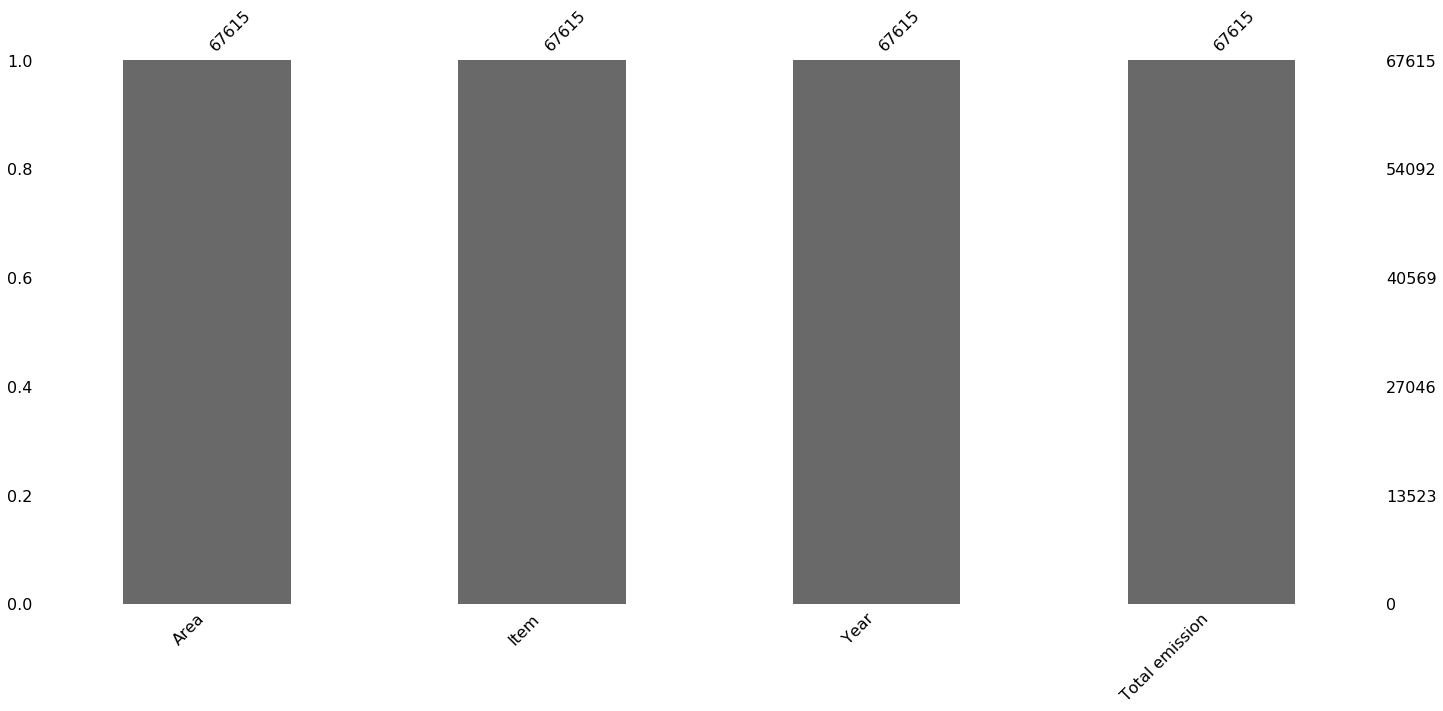

In [39]:
msno.bar(emission)

# Population dataset

In [41]:
pop.drop(['Domain Code','Domain','Area Code','Element Code','Element','Item Code','Item','Year Code','Unit','Flag','Flag Description','Note'],axis=1,inplace=True)
pop.rename(columns={'Value':'Annual Population'},inplace=True)


KeyError: "['Domain Code' 'Domain' 'Area Code' 'Element Code' 'Element' 'Item Code'\n 'Item' 'Year Code' 'Unit' 'Flag' 'Flag Description' 'Note'] not found in axis"

In [42]:
pop.head(2)

,Area,Year,Annual Population
0,Afghanistan,1950,7752.118
1,Afghanistan,1951,7840.156


# Merging all dataset together 

In [48]:
#Merging emission table with the population
emission=pd.merge(emission,pop,on=['Area','Year'],how='left')

In [49]:
print("Total number of data points in emission table is: ",emission.shape[0])

Total number of data points in emission table is:  67615


In [50]:
#Merging emission table with production table
emission=pd.merge(emission,x22,on=['Area','Item','Year'],how='left')
print(emission.shape[0])
emission.head()

67615


,Area,Item,Year,Total emission,Annual Population,Area harvested,Production quantity,Yield
0,Afghanistan,Barley,1961,35.3617,9169.410,350000.0,378000.0,10800.0
1,Afghanistan,Barley,1962,35.3617,9351.441,350000.0,378000.0,10800.0
2,Afghanistan,Barley,1963,35.3617,9543.205,350000.0,378000.0,10800.0
3,Afghanistan,Barley,1964,35.4883,9744.781,350000.0,380000.0,10857.0
4,Afghanistan,Barley,1965,35.4883,9956.320,350000.0,380000.0,10857.0


In [51]:
#Reordering columns so that Total emission(Label) falls in the end for sake of simplicity
neworder=[0,1,2,5,6,7,4,3]
emission=emission[emission.columns[neworder]]#Rearanging the columns

In [52]:
emission.rename(columns={'Area':'Country','Item':'Crop'},inplace=True)

In [53]:
emission.head(2)

,Country,Crop,Year,Area harvested,Production quantity,Yield,Annual Population,Total emission
0,Afghanistan,Barley,1961,350000.0,378000.0,10800.0,9169.410,35.3617
1,Afghanistan,Barley,1962,350000.0,378000.0,10800.0,9351.441,35.3617


In [88]:

#Downloading the emission file as backup
emission.to_csv (r'/Users/Documents/Project/emission.csv', index = False, header=True)

Time to do some Exploratory data analysis

In [54]:
#Calculating percentage of missing values in Emission dataset
emission.isnull().sum()*100/len(emission)

Country                0.00000
Crop                   0.00000
Year                   0.00000
Area harvested         1.52481
Production quantity    1.52481
Yield                  1.52481
Annual Population      0.00000
Total emission         0.00000
dtype: float64

In [55]:
#Complete case analysis, because the missing value percentange is less than 2%
emission.dropna(subset=['Area harvested','Production quantity','Yield'], inplace=True)

In [56]:
#Verifying null values in emission table is Zero
emission.isnull().sum()*100/len(emission)

Country                0.0
Crop                   0.0
Year                   0.0
Area harvested         0.0
Production quantity    0.0
Yield                  0.0
Annual Population      0.0
Total emission         0.0
dtype: float64

In [57]:
round(emission.describe(),1)

,Area harvested,Production quantity,Yield,Annual Population,Total emission
count,66584.0,66584.0,66584.0,66584.0,66584.0
mean,782179.8,3253076.9,81957.5,55908.6,172.0
std,3431116.1,18863772.4,174639.4,183014.4,953.5
min,0.0,0.0,0.0,4.4,0.0
25%,4100.0,8728.5,10263.0,4059.7,0.5
50%,40000.0,97399.0,20000.0,10434.5,5.1
75%,225654.8,802767.5,50331.2,31411.1,35.3
max,70205008.0,768594154.0,2088710.0,1452625.2,20742.2


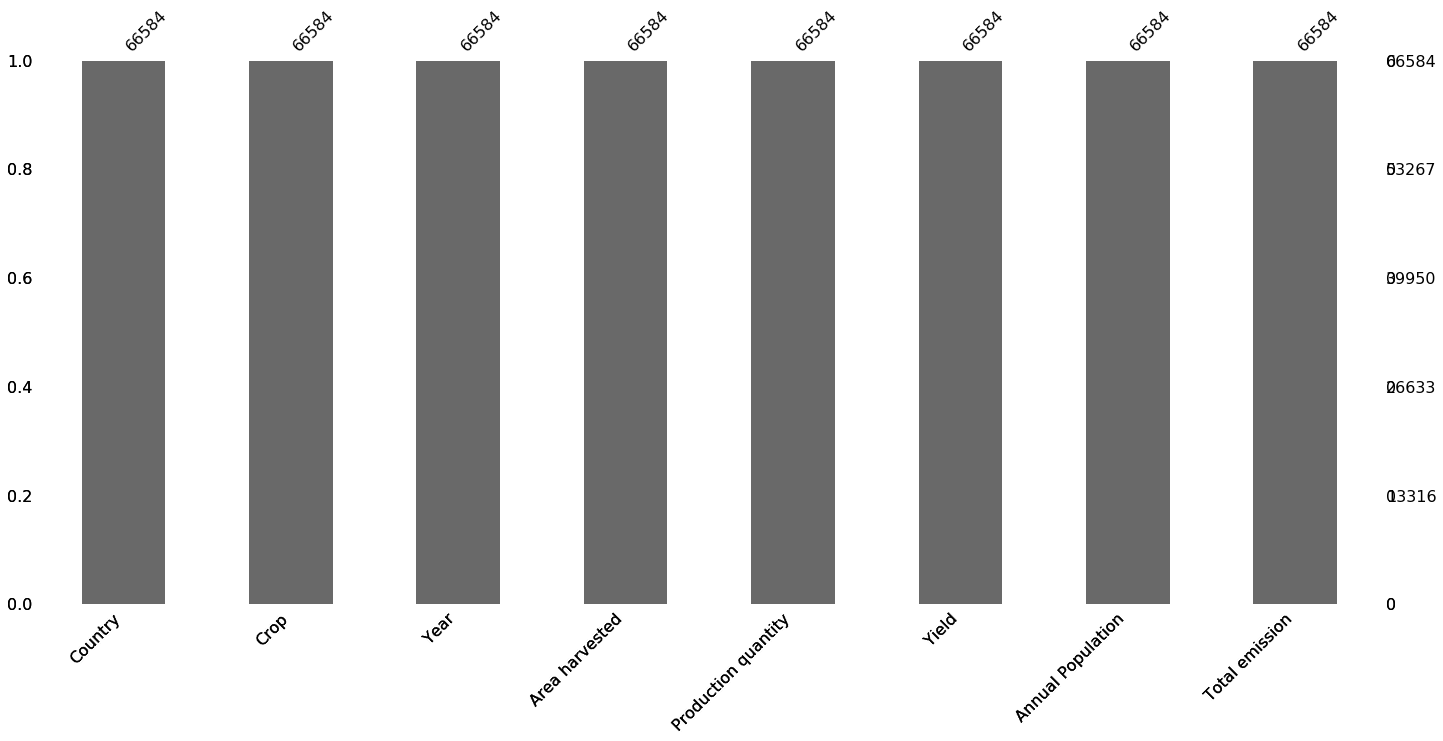

In [58]:

msno.bar(emission[emission.isnull().any(axis=1)])
msno.bar(emission)

In [59]:
print('The total number of datapoints in emission table is:',emission.shape[0])

The total number of datapoints in emission table is: 66584


In [60]:
#Next step: normalizing values by unit
print('unique units of measurement',cleanProd['Unit'].unique())
print("Unit for Area harvest: ha")
print("Unit for Production: tonnes")
print("Unit for Yield: hg/ha")
#1tonne =10000 hectogram

#Bring this all numbers to same measuring unit

unique units of measurement ['ha' 'hg/ha' 'tonnes']
Unit for Area harvest: ha
Unit for Production: tonnes
Unit for Yield: hg/ha


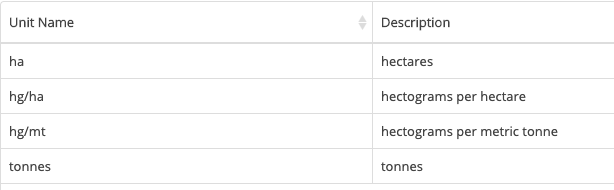

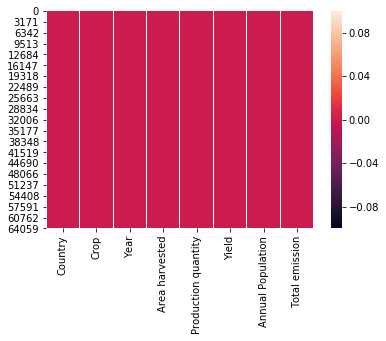

In [61]:
sns.heatmap(emission.isnull(), cbar=True)

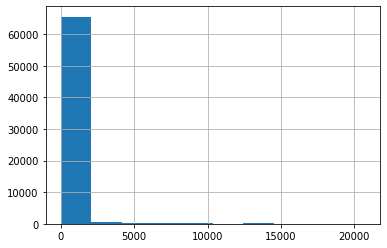

In [70]:

# emission['Area harvested'].plot.kde()
emission['Total emission'].hist()

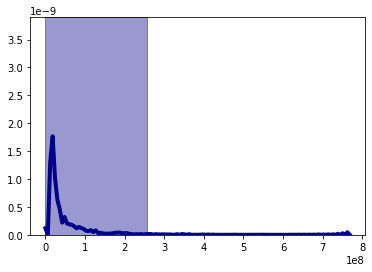

In [25]:
sns.distplot(emission[['Production quantity']], hist=True, kde=True, 
             bins=int(18/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

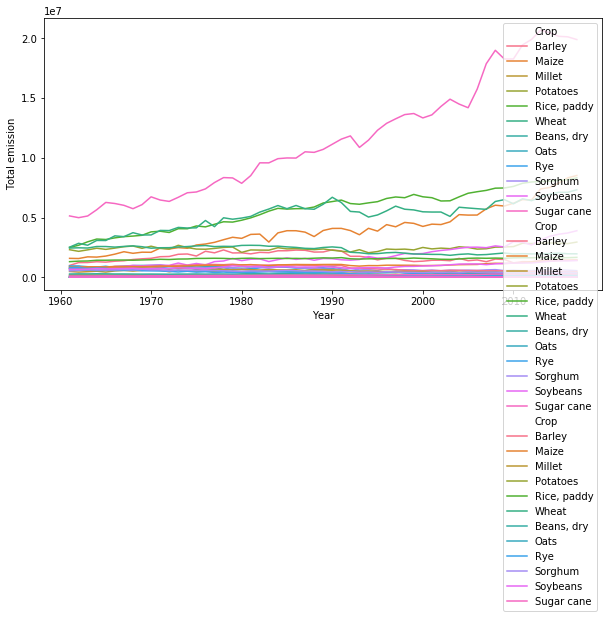

In [73]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Year", y="Production quantity",
             hue="Crop",
             data=emission,ci=None,markers='boolean')

sns.lineplot(x="Year", y="Area harvested",
             hue="Crop",
             data=emission,ci=None,markers='boolean')

sns.lineplot(x="Year", y="Total emission",
             hue="Crop",ci=None,
             data=emission)

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x113c2fdd0> (for post_execute):


KeyboardInterrupt: 

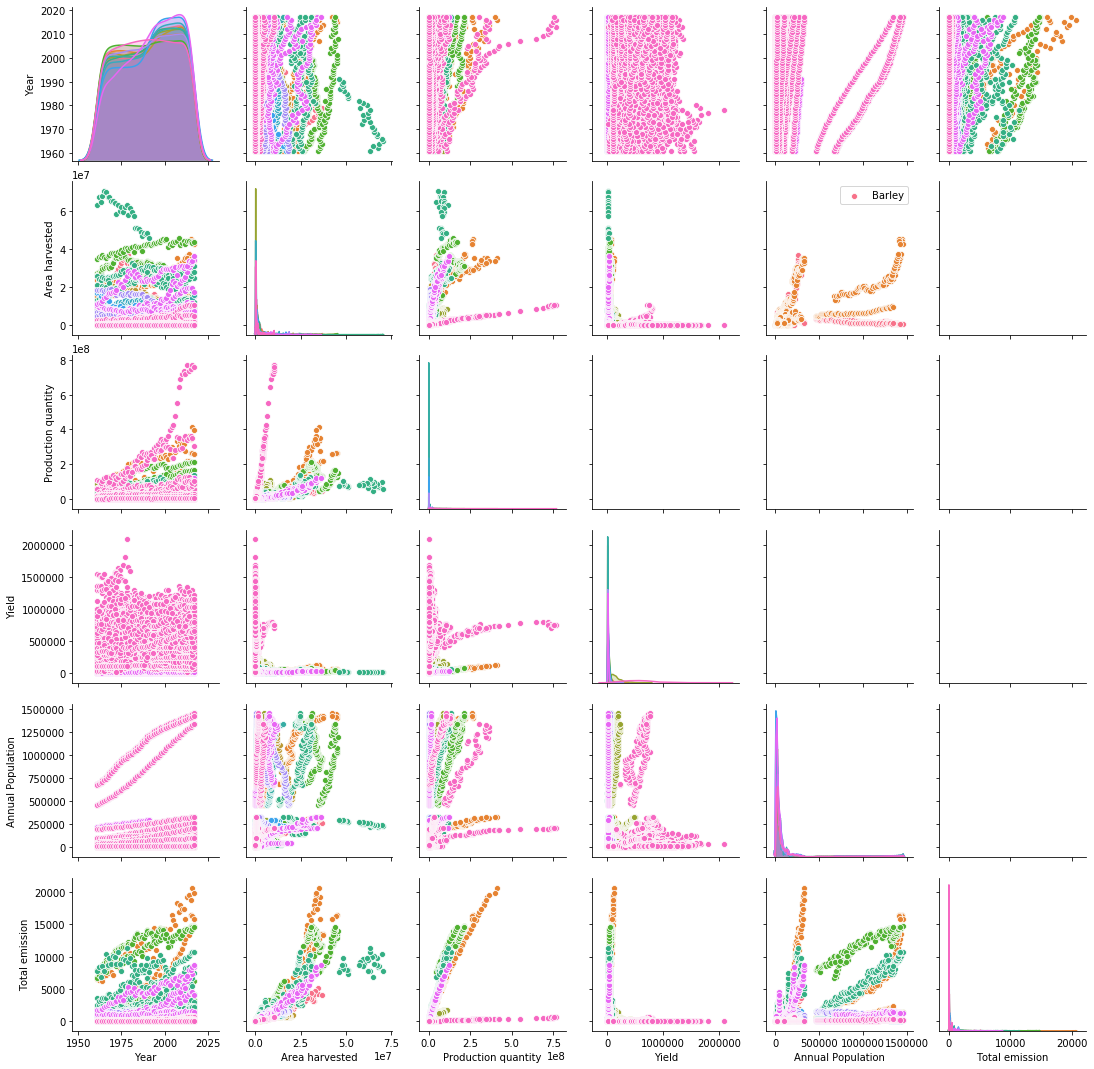

In [74]:
sns.pairplot(emission, hue="Crop");

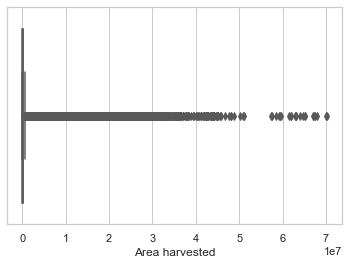

In [75]:
sns.set(style="whitegrid")
sns.boxplot(x=emission["Area harvested"],palette="Set2")

# emission.boxplot(column='Area harvested')
# plt.show()

In [77]:
X=emission.copy()
filter(None,(emission.loc[(emission['Area harvested'].notnull())]))
temp_X = X[X['Area harvested'] > 0]

In [78]:
temp_X.loc[temp_X['Area harvested']==0]

,Country,Crop,Year,Area harvested,Production quantity,Yield,Annual Population,Total emission


In [79]:
emission.loc[emission['Area harvested']==0]

,Country,Crop,Year,Area harvested,Production quantity,Yield,Annual Population,Total emission
3952,Bahrain,Potatoes,2005,0.0,5.0,163864.0,889.164,0.0001
12174,"China, Hong Kong SAR","Rice, paddy",1997,0.0,0.0,19226.0,6299.921,0.0000
12175,"China, Hong Kong SAR","Rice, paddy",1998,0.0,0.0,19245.0,6416.992,0.0000
12176,"China, Hong Kong SAR","Rice, paddy",1999,0.0,0.0,19292.0,6522.466,0.0000
12177,"China, Hong Kong SAR","Rice, paddy",2000,0.0,0.0,19233.0,6606.327,0.0000
12178,"China, Hong Kong SAR","Rice, paddy",2001,0.0,0.0,19058.0,6664.772,0.0000
12179,"China, Hong Kong SAR","Rice, paddy",2002,0.0,0.0,19899.0,6701.775,0.0000
12180,"China, Hong Kong SAR","Rice, paddy",2003,0.0,0.0,19898.0,6724.677,0.0000
12181,"China, Hong Kong SAR","Rice, paddy",2004,0.0,0.0,19898.0,6744.566,0.0000
12182,"China, Hong Kong SAR","Rice, paddy",2005,0.0,0.0,19899.0,6769.574,0.0000
